# Chapter 4: Rhythm and Groove

## Learning Objectives

By the end of this chapter you will be able to:

1. Understand **time signatures** and how they organize beats into measures
2. Create and visualize **rhythmic patterns** as grids
3. Recognize and generate **syncopation** -- accents on unexpected beats
4. Analyze **prosody** -- how the rhythm of words maps to the rhythm of music
5. Build a simple **drum pattern sequencer**

---

## The Grid of Time

Music divides time into equal units. The hierarchy:

```
Beat (pulse)           The basic unit you tap your foot to
  └── Subdivision      Dividing beats into 2 (straight) or 3 (swing/triplet)
Measure (bar)          A group of beats (e.g., 4 beats in 4/4 time)
  └── Phrase           A group of measures (typically 4 or 8 bars)
```

The **time signature** tells us how many beats per measure and which note value gets one beat:

$$\frac{\text{beats per measure}}{\text{note value of one beat}}$$

- $\frac{4}{4}$: 4 quarter-note beats per measure (most common in pop/rock)
- $\frac{3}{4}$: 3 quarter-note beats (waltz)
- $\frac{6}{8}$: 6 eighth-note beats, felt as 2 groups of 3 (compound duple)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

@dataclass
class TimeSignature:
    """Represents a musical time signature."""
    beats_per_bar: int          # numerator
    beat_value: int             # denominator (4 = quarter note)
    subdivisions_per_beat: int  # how many grid slots per beat

    @property
    def grid_size(self) -> int:
        """Total grid slots per measure."""
        return self.beats_per_bar * self.subdivisions_per_beat
    
    def beat_positions(self) -> list[int]:
        """Grid positions where beats fall."""
        return [i * self.subdivisions_per_beat for i in range(self.beats_per_bar)]

# Common time signatures
time_sigs = {
    "4/4 (Common Time)": TimeSignature(4, 4, 4),   # 16th-note grid
    "3/4 (Waltz)":       TimeSignature(3, 4, 4),
    "6/8 (Compound)":    TimeSignature(6, 8, 2),
    "5/4 (Odd Meter)":   TimeSignature(5, 4, 4),
}

for name, ts in time_sigs.items():
    beats = ts.beat_positions()
    grid = ["." for _ in range(ts.grid_size)]
    for b in beats:
        grid[b] = "X"  # Mark beat positions
    grid_str = " ".join(grid)
    print(f"{name:<22}  grid({ts.grid_size}): {grid_str}")
    print(f"{'':22}  beats on: {beats}")
    print()

4/4 (Common Time)       grid(16): X . . . X . . . X . . . X . . .
                        beats on: [0, 4, 8, 12]

3/4 (Waltz)             grid(12): X . . . X . . . X . . .
                        beats on: [0, 4, 8]

6/8 (Compound)          grid(12): X . X . X . X . X . X .
                        beats on: [0, 2, 4, 6, 8, 10]

5/4 (Odd Meter)         grid(20): X . . . X . . . X . . . X . . . X . . .
                        beats on: [0, 4, 8, 12, 16]



## Rhythm Patterns as Binary Grids

We can represent any rhythm as a **binary sequence**: 1 = hit, 0 = rest. With a 16th-note grid in 4/4 time, each measure has 16 slots.

```
Position:  1  .  .  .  2  .  .  .  3  .  .  .  4  .  .  .
Kick:      X  .  .  .  .  .  .  .  X  .  .  .  .  .  .  .
Snare:     .  .  .  .  X  .  .  .  .  .  .  .  X  .  .  .
Hi-hat:    X  .  X  .  X  .  X  .  X  .  X  .  X  .  X  .
```

In [2]:
# Drum patterns as binary arrays
# Each pattern is a dict mapping instrument name to a 16-element binary list

DrumPattern = dict[str, list[int]]

def make_pattern(kick: str, snare: str, hihat: str) -> DrumPattern:
    """Create a drum pattern from shorthand strings.
    'x' = hit, '.' = rest. Must be 16 characters.
    """
    def parse(s: str) -> list[int]:
        return [1 if c.lower() == 'x' else 0 for c in s.replace(" ", "")]
    return {"Kick": parse(kick), "Snare": parse(snare), "Hi-hat": parse(hihat)}

# Classic patterns
patterns: dict[str, DrumPattern] = {
    "Basic Rock": make_pattern(
        kick  = "x....... x.......",
        snare = "....x... ....x...",
        hihat = "x.x.x.x. x.x.x.x.",
    ),
    "Disco": make_pattern(
        kick  = "x...x... x...x...",
        snare = "....x... ....x...",
        hihat = "x.x.x.x. x.x.x.x.",
    ),
    "Hip-Hop": make_pattern(
        kick  = "x..x..x. ...x....",
        snare = "....x... ....x..x",
        hihat = "x.xxx.xx x.xxx.xx",
    ),
    "Reggae": make_pattern(
        kick  = "x....... x.......",
        snare = "..x...x. ..x...x.",
        hihat = "x.x.x.x. x.x.x.x.",
    ),
}

# Print patterns as grids
for name, pattern in patterns.items():
    print(f"=== {name} ===")
    print(f"{'':8}  1 . . . 2 . . . 3 . . . 4 . . .")
    for inst, hits in pattern.items():
        row = " ".join("X" if h else "." for h in hits)
        print(f"{inst:<8}  {row}")
    print()

=== Basic Rock ===
          1 . . . 2 . . . 3 . . . 4 . . .
Kick      X . . . . . . . X . . . . . . .
Snare     . . . . X . . . . . . . X . . .
Hi-hat    X . X . X . X . X . X . X . X .

=== Disco ===
          1 . . . 2 . . . 3 . . . 4 . . .
Kick      X . . . X . . . X . . . X . . .
Snare     . . . . X . . . . . . . X . . .
Hi-hat    X . X . X . X . X . X . X . X .

=== Hip-Hop ===
          1 . . . 2 . . . 3 . . . 4 . . .
Kick      X . . X . . X . . . . X . . . .
Snare     . . . . X . . . . . . . X . . X
Hi-hat    X . X X X . X X X . X X X . X X

=== Reggae ===
          1 . . . 2 . . . 3 . . . 4 . . .
Kick      X . . . . . . . X . . . . . . .
Snare     . . X . . . X . . . X . . . X .
Hi-hat    X . X . X . X . X . X . X . X .



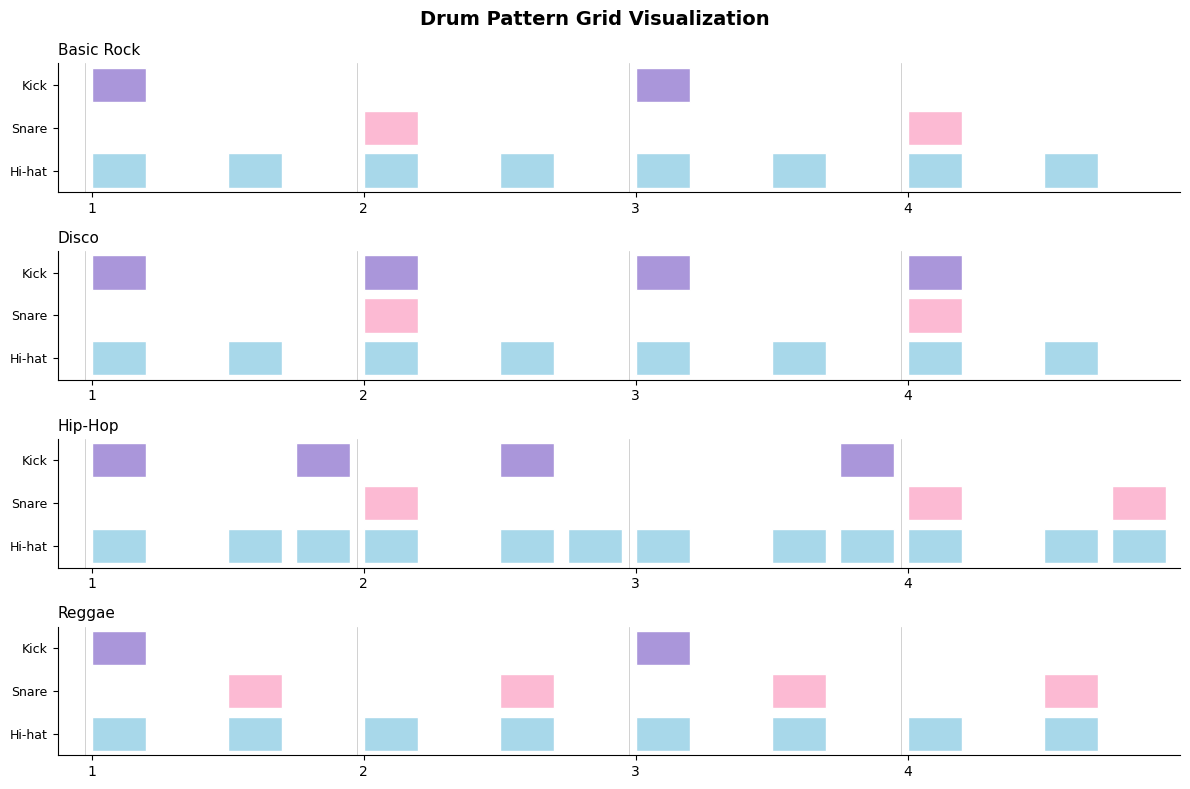

In [3]:
# Visualize drum patterns as colored grids

fig, axes = plt.subplots(len(patterns), 1, figsize=(12, 8))
fig.suptitle("Drum Pattern Grid Visualization", fontsize=14, fontweight="bold")

inst_colors = {"Kick": "#AA96DA", "Snare": "#FCBAD3", "Hi-hat": "#A8D8EA"}

for ax, (name, pattern) in zip(axes, patterns.items()):
    instruments = list(pattern.keys())
    grid = np.array([pattern[inst] for inst in instruments])
    
    for row_idx, inst in enumerate(instruments):
        for col_idx in range(16):
            if grid[row_idx, col_idx]:
                color = inst_colors[inst]
                rect = plt.Rectangle((col_idx, row_idx - 0.4), 0.8, 0.8,
                                    facecolor=color, edgecolor="white", linewidth=1)
                ax.add_patch(rect)
    
    # Beat markers
    for beat in range(4):
        ax.axvline(x=beat * 4 - 0.1, color="gray", linewidth=0.5, alpha=0.5)
    
    ax.set_xlim(-0.5, 16)
    ax.set_ylim(-0.5, len(instruments) - 0.5)
    ax.set_yticks(range(len(instruments)))
    ax.set_yticklabels(instruments, fontsize=9)
    ax.set_xticks(range(0, 16, 4))
    ax.set_xticklabels(["1", "2", "3", "4"])
    ax.set_title(name, fontsize=11, loc="left")
    ax.invert_yaxis()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

## Syncopation: The Off-Beat Surprise

**Syncopation** is accenting beats that are normally weak. In 4/4 time:

- Beats 1 and 3 are **strong** (downbeats)
- Beats 2 and 4 are **weak** (backbeats -- though in rock, snare on 2 and 4 is standard)
- The "and" subdivisions (between beats) are **weak**
- 16th notes between the "ands" are **very weak**

Syncopation creates tension and groove by placing emphasis where you don't expect it.

We can **measure** syncopation by counting how many hits fall on weak positions.

In [4]:
def syncopation_score(pattern: list[int], beats_per_bar: int = 4) -> float:
    """Compute a syncopation score for a rhythmic pattern.
    
    Higher score = more syncopated.
    Weight scheme: downbeats are low weight, offbeats are high weight.
    A hit on a weak position contributes more to the score.
    """
    grid_size = len(pattern)
    subdivs = grid_size // beats_per_bar  # subdivisions per beat
    
    # Assign weights: 0 for downbeat, higher for weaker positions
    # In a 16-slot grid: positions 0,4,8,12 = beats (weight 0)
    # positions 2,6,10,14 = 8th notes (weight 1)
    # positions 1,3,5,7,... = 16th notes (weight 2)
    weights = []
    for i in range(grid_size):
        if i % subdivs == 0:
            weights.append(0)   # on the beat
        elif i % (subdivs // 2) == 0:
            weights.append(1)   # 8th note
        else:
            weights.append(2)   # 16th note
    
    # Score = sum of weights for hit positions, normalized
    total_hits = sum(pattern)
    if total_hits == 0:
        return 0.0
    score = sum(w * h for w, h in zip(weights, pattern))
    max_possible = 2 * total_hits  # if all hits were on 16th notes
    return score / max_possible if max_possible > 0 else 0.0

# Compute syncopation scores for each instrument in each pattern
print(f"{'Pattern':<14} {'Kick':<10} {'Snare':<10} {'Hi-hat':<10} {'Combined':<10}")
print("─" * 54)
for name, pattern in patterns.items():
    scores = {inst: syncopation_score(hits) for inst, hits in pattern.items()}
    # Combined: merge all hits
    combined = [max(pattern[inst][i] for inst in pattern) for i in range(16)]
    combined_score = syncopation_score(combined)
    print(f"{name:<14} {scores['Kick']:<10.2f} {scores['Snare']:<10.2f} "
          f"{scores['Hi-hat']:<10.2f} {combined_score:<10.2f}")

Pattern        Kick       Snare      Hi-hat     Combined  
──────────────────────────────────────────────────────
Basic Rock     0.00       0.00       0.25       0.25      
Disco          0.00       0.00       0.25       0.25      
Hip-Hop        0.62       0.33       0.50       0.50      
Reggae         0.00       0.50       0.25       0.25      


## Prosody: When Words Meet Rhythm

**Prosody** is the art of matching the natural rhythm of speech to the rhythm of music. Good prosody means stressed syllables land on strong beats.

English words have natural stress patterns:
- **MU**-sic (stressed-unstressed, trochee)
- a-**LONE** (unstressed-stressed, iamb)
- beau-ti-**FUL** (unstressed-unstressed-stressed, anapest)

When the musical accent contradicts the word accent, the lyric sounds awkward.

In [5]:
# Simple syllable stress analyzer
# We use a basic dictionary approach (in practice you would use CMU Pronouncing Dictionary)

# Stress patterns: 1 = stressed, 0 = unstressed
STRESS_DICT: dict[str, list[int]] = {
    "music":     [1, 0],
    "alone":     [0, 1],
    "beautiful": [1, 0, 0],
    "together":  [0, 1, 0],
    "love":      [1],
    "the":       [0],
    "and":       [0],
    "you":       [1],
    "i":         [1],
    "my":        [1],
    "heart":     [1],
    "is":        [0],
    "a":         [0],
    "beat":      [1],
    "beating":   [1, 0],
    "rhythm":    [1, 0],
    "feel":      [1],
    "feeling":   [1, 0],
    "never":     [1, 0],
    "forever":   [0, 1, 0],
    "tonight":   [0, 1],
    "away":      [0, 1],
    "again":     [0, 1],
    "under":     [1, 0],
    "over":      [1, 0],
    "dancing":   [1, 0],
    "singing":   [1, 0],
    "in":        [0],
    "to":        [0],
    "we":        [1],
    "can":       [1],
    "will":      [1],
    "this":      [1],
    "with":      [0],
}

def analyze_stress(lyric_line: str) -> list[int]:
    """Return the stress pattern for a line of lyrics.
    Unknown words default to [1] (single stressed syllable).
    """
    words = lyric_line.lower().strip().split()
    stress = []
    for word in words:
        # Strip punctuation
        clean = word.strip(".,!?;:")
        pattern = STRESS_DICT.get(clean, [1])  # default: stressed monosyllable
        stress.extend(pattern)
    return stress

# Analyze some lyric lines
lines = [
    "My heart is beating tonight",
    "Dancing alone in the rhythm",
    "You and I together forever",
    "Never again will I feel this away",
]

for line in lines:
    stress = analyze_stress(line)
    visual = " ".join("S" if s else "w" for s in stress)
    print(f"  \"{line}\"")
    print(f"  Stress: {visual}")
    print(f"  Syllables: {len(stress)}")
    print()

  "My heart is beating tonight"
  Stress: S S w S w w S
  Syllables: 7

  "Dancing alone in the rhythm"
  Stress: S w w S w w S w
  Syllables: 8

  "You and I together forever"
  Stress: S w S w S w w S w
  Syllables: 9

  "Never again will I feel this away"
  Stress: S w w S S S S S w S
  Syllables: 10



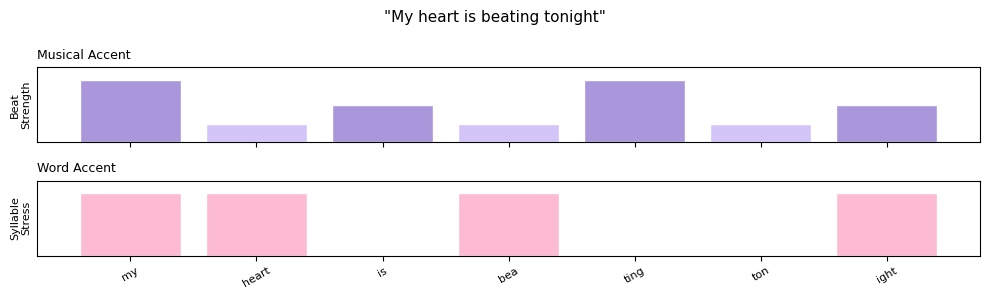

In [6]:
# Visualize how lyrics map to a rhythmic grid
# Good prosody: stressed syllables align with strong beats

def plot_prosody(lyric: str, beats_per_bar: int = 4) -> None:
    """Show how lyric stress aligns with musical beats."""
    stress = analyze_stress(lyric)
    n_syllables = len(stress)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 3), sharex=True)
    fig.suptitle(f'"{lyric}"', fontsize=11)
    
    # Top: musical beat strength (alternating strong/weak)
    beat_strength = []
    for i in range(n_syllables):
        if i % beats_per_bar == 0:
            beat_strength.append(1.0)   # strong beat
        elif i % beats_per_bar == 2:
            beat_strength.append(0.6)   # medium beat
        else:
            beat_strength.append(0.3)   # weak beat
    
    colors_beat = ["#AA96DA" if b > 0.5 else "#D4C5F9" for b in beat_strength]
    ax1.bar(range(n_syllables), beat_strength, color=colors_beat, edgecolor="white")
    ax1.set_ylabel("Beat\nStrength", fontsize=8)
    ax1.set_ylim(0, 1.2)
    ax1.set_yticks([])
    ax1.set_title("Musical Accent", fontsize=9, loc="left")
    
    # Bottom: syllable stress
    colors_stress = ["#FCBAD3" if s else "#FFE4EC" for s in stress]
    ax2.bar(range(n_syllables), stress, color=colors_stress, edgecolor="white")
    ax2.set_ylabel("Syllable\nStress", fontsize=8)
    ax2.set_ylim(0, 1.2)
    ax2.set_yticks([])
    ax2.set_title("Word Accent", fontsize=9, loc="left")
    
    # Mark alignment
    words = lyric.lower().strip().split()
    syllable_labels = []
    for word in words:
        clean = word.strip(".,!?;:")
        n_syl = len(STRESS_DICT.get(clean, [1]))
        if n_syl == 1:
            syllable_labels.append(clean)
        else:
            # Simple syllable approximation: just split evenly
            chunk = len(clean) // n_syl
            for j in range(n_syl):
                start = j * chunk
                end = start + chunk if j < n_syl - 1 else len(clean)
                syllable_labels.append(clean[start:end])
    
    ax2.set_xticks(range(len(syllable_labels)))
    ax2.set_xticklabels(syllable_labels[:n_syllables], fontsize=8, rotation=30)
    
    plt.tight_layout()
    plt.show()

plot_prosody("My heart is beating tonight")

## Drum Pattern Sequencer with Audio

Let's build a simple sequencer that converts our grid patterns into audio using noise-based drum synthesis.

In [7]:
from IPython.display import Audio

def synth_kick(duration: float = 0.15, sr: int = 22050) -> np.ndarray:
    """Synthesize a kick drum: sine wave with pitch drop."""
    t = np.linspace(0, duration, int(sr * duration), endpoint=False)
    # Frequency drops from 150 Hz to 50 Hz
    freq = 150 * np.exp(-t * 20) + 50
    phase = np.cumsum(2 * np.pi * freq / sr)
    wave = np.sin(phase) * np.exp(-t * 15)
    return wave * 0.8

def synth_snare(duration: float = 0.12, sr: int = 22050) -> np.ndarray:
    """Synthesize a snare: noise burst + sine."""
    t = np.linspace(0, duration, int(sr * duration), endpoint=False)
    noise = np.random.default_rng(42).normal(0, 1, len(t)) * np.exp(-t * 25)
    tone = np.sin(2 * np.pi * 200 * t) * np.exp(-t * 30)
    return (noise * 0.5 + tone * 0.3) * 0.7

def synth_hihat(duration: float = 0.05, sr: int = 22050) -> np.ndarray:
    """Synthesize a hi-hat: short noise burst."""
    t = np.linspace(0, duration, int(sr * duration), endpoint=False)
    noise = np.random.default_rng(7).normal(0, 1, len(t)) * np.exp(-t * 60)
    return noise * 0.3

def sequencer(
    pattern: DrumPattern,
    bpm: int = 120,
    bars: int = 2,
    sr: int = 22050,
) -> np.ndarray:
    """Render a drum pattern to audio.
    
    Args:
        pattern: dict mapping instrument name to hit list
        bpm: tempo in beats per minute
        bars: number of times to repeat the pattern
        sr: sample rate
    """
    # Duration of one 16th note
    sixteenth_dur = 60 / bpm / 4  # seconds
    grid_size = 16
    total_samples = int(sixteenth_dur * grid_size * bars * sr)
    audio = np.zeros(total_samples)
    
    # Synthesize individual drum sounds
    sounds = {
        "Kick":   synth_kick(sr=sr),
        "Snare":  synth_snare(sr=sr),
        "Hi-hat": synth_hihat(sr=sr),
    }
    
    for bar in range(bars):
        for inst_name, hits in pattern.items():
            sound = sounds.get(inst_name, synth_hihat(sr=sr))
            for i, hit in enumerate(hits):
                if hit:
                    pos = int((bar * grid_size + i) * sixteenth_dur * sr)
                    end = min(pos + len(sound), total_samples)
                    audio[pos:end] += sound[:end - pos]
    
    # Normalize
    peak = np.max(np.abs(audio))
    if peak > 0:
        audio = audio / peak * 0.8
    return audio

# Play the basic rock beat
audio = sequencer(patterns["Basic Rock"], bpm=100, bars=4)
print("Basic Rock beat at 100 BPM (4 bars):")
Audio(audio, rate=22050)

Basic Rock beat at 100 BPM (4 bars):


In [8]:
# Play the hip-hop beat for comparison
audio = sequencer(patterns["Hip-Hop"], bpm=90, bars=4)
print("Hip-Hop beat at 90 BPM (4 bars):")
Audio(audio, rate=22050)

Hip-Hop beat at 90 BPM (4 bars):


## Creating Your Own Patterns

Here is a pattern builder that generates variations algorithmically.

In [9]:
def generate_pattern(
    density: float = 0.3,
    syncopation_level: float = 0.2,
    seed: int = 42,
) -> DrumPattern:
    """Generate a random drum pattern with controllable density and syncopation.
    
    Args:
        density: probability of a hit on any given position (0-1)
        syncopation_level: how much to favor off-beat positions (0-1)
        seed: random seed
    """
    rng = np.random.default_rng(seed)
    
    # Kick: favor beats 1 and 3
    kick = [0] * 16
    kick[0] = 1  # always hit beat 1
    for i in range(1, 16):
        # On-beat positions get base density, off-beat get syncopation boost
        prob = density * (1 + syncopation_level * (i % 4 != 0))
        if rng.random() < prob * 0.5:  # kick is sparse
            kick[i] = 1
    
    # Snare: typically on beats 2 and 4
    snare = [0] * 16
    snare[4] = 1   # beat 2
    snare[12] = 1  # beat 4
    for i in [2, 6, 10, 14]:  # possible ghost notes
        if rng.random() < syncopation_level:
            snare[i] = 1
    
    # Hi-hat: denser, regular
    hihat = [0] * 16
    for i in range(16):
        prob = 0.8 if i % 2 == 0 else density
        if rng.random() < prob:
            hihat[i] = 1
    
    return {"Kick": kick, "Snare": snare, "Hi-hat": hihat}

# Generate and display a pattern
custom = generate_pattern(density=0.4, syncopation_level=0.3, seed=77)
print("Generated pattern:")
print(f"{'':8}  1 . . . 2 . . . 3 . . . 4 . . .")
for inst, hits in custom.items():
    row = " ".join("X" if h else "." for h in hits)
    print(f"{inst:<8}  {row}")

print(f"\nSyncopation score: {syncopation_score([max(custom[i][j] for i in custom) for j in range(16)]):.2f}")

# Play it
audio = sequencer(custom, bpm=110, bars=4)
Audio(audio, rate=22050)

Generated pattern:
          1 . . . 2 . . . 3 . . . 4 . . .
Kick      X . . X . . . . X . . . . X . .
Snare     . . . . X . . . . . X . X . . .
Hi-hat    X X X X X X X X X X X X X . X .

Syncopation score: 0.60


## Exercises

1. **Design a pattern**: Create a 6/8 time signature drum pattern (12 8th-note slots). What genres use 6/8?
2. **Syncopation experiment**: Generate patterns with `syncopation_level` at 0.0, 0.5, and 1.0. Listen to each. Which has the most groove?
3. **Prosody check**: Write a 4-line verse and use `analyze_stress` to check the stress pattern. Do stressed syllables fall on strong beats?
4. **Genre analysis**: Research the typical drum patterns for bossa nova and create one using `make_pattern`.

---

## What's Next

Rhythm tells us **when** things happen. In **Chapter 5: Lyrics**, we combine rhythm with words -- exploring rhyme schemes, syllable counting, and the craft of writing words that sing.